In [1]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../../data/sentiment_analysis_predictions/by_day/AMC.csv", parse_dates=["created_at"])
df.set_index("created_at", drop=True, inplace=True)

In [3]:
data = yf.download("AMC", start="2021-05-02", end="2022-05-01")

[*********************100%***********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-03,10.110000,10.120000,9.610000,9.710000,9.710000,31251200
2021-05-04,9.630000,9.750000,9.050000,9.390000,9.390000,35222400
2021-05-05,9.410000,9.570000,9.080000,9.170000,9.170000,27608700
2021-05-06,9.330000,9.400000,8.930000,9.000000,9.000000,39586300
2021-05-07,9.320000,9.790000,9.140000,9.510000,9.510000,38245000
...,...,...,...,...,...,...
2022-04-25,16.389999,17.030001,16.290001,16.959999,16.959999,26444200
2022-04-26,16.889999,17.090000,15.490000,15.500000,15.500000,24732800
2022-04-27,15.390000,16.250000,15.250000,15.850000,15.850000,26605900


In [5]:
df_merged = pd.merge(df,data, how='inner', left_index=True, right_index=True)

In [6]:
#df_merged["prev_adj_close"] = df_merged["Adj Close"].shift(1)

## 3. Calculating Returns

In [7]:
# Return in percent
df_merged["return"] = df_merged["Adj Close"].pct_change()

In [8]:
df_merged["log_return"] = np.log(df_merged["Adj Close"]) - np.log(df_merged["Adj Close"].shift(1))

In [9]:
df_merged["log_return_shift"] = df_merged["log_return"].shift(-1)

In [10]:
df_merged["pos_minus_neg_diff"] = df_merged["pos_minus_neg"].diff(1)

In [11]:
df_merged.dropna(inplace=True)

In [12]:
df_merged

,Negative,Neutral,Positive,count,pos_minus_neg,pos_minus_neg_times_count,Open,High,Low,Close,Adj Close,Volume,return,log_return,log_return_shift,pos_minus_neg_diff
2021-05-04,0.324312,0.219098,0.456590,124,0.132277,16.402389,9.630000,9.750000,9.050000,9.390000,9.390000,35222400,-0.032956,-0.033511,-0.023708,-0.139480
2021-05-05,0.204789,0.349033,0.446178,257,0.241389,62.036886,9.410000,9.570000,9.080000,9.170000,9.170000,27608700,-0.023429,-0.023708,-0.018713,0.109111
2021-05-06,0.238258,0.343585,0.418157,519,0.179900,93.367912,9.330000,9.400000,8.930000,9.000000,9.000000,39586300,-0.018539,-0.018713,0.055119,-0.061489
2021-05-07,0.211977,0.340285,0.447738,323,0.235762,76.150988,9.320000,9.790000,9.140000,9.510000,9.510000,38245000,0.056667,0.055119,0.023897,0.055862
2021-05-10,0.235655,0.315471,0.448873,281,0.213218,59.914264,9.900000,10.150000,9.560000,9.740000,9.740000,41015300,0.024185,0.023897,0.031332,-0.022544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-22,0.320121,0.381434,0.298444,35,-0.021677,-0.758702,17.120001,17.610001,16.100000,16.520000,16.520000,26431700,-0.019585,-0.019779,0.026286,0.000643
2022-04-25,0.151190,0.421520,0.427291,68,0.276101,18.774880,16.389999,17.030001,16.290001,16.959999,16.959999,26444200,0.026634,0.026286,-0.090018,0.297778
2022-04-26,0.480377,0.361146,0.158477,46,-0.321900,-14.807422,16.889999,17.090000,15.490000,15.500000,15.500000,24732800,-0.086085,-0.090018,0.022330,-0.598002
2022-04-27,0.318885,0.384888,0.296227,44,-0.022657,-0.996929,15.390000,16.250000,15.250000,15.850000,15.850000,26605900,0.022581,0.022330,-0.013338,0.299243


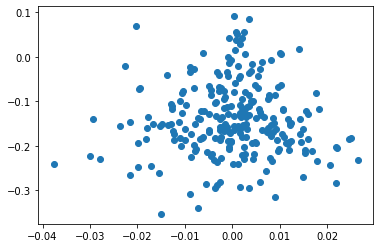

In [74]:
plt.scatter(df_merged["log_return_shift"], df_merged["pos_minus_neg"])
plt.show()

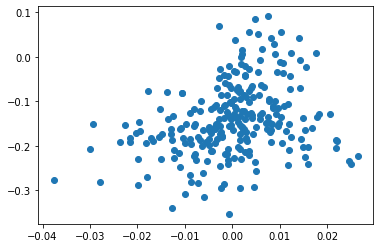

In [75]:
plt.scatter(df_merged["log_return"], df_merged["pos_minus_neg"])
plt.show()

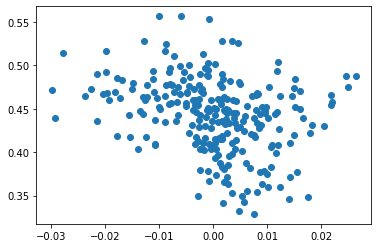

In [92]:
plt.scatter(df_merged["log_return"], df_merged["Negative"])
plt.show()

In [13]:
print(stats.pearsonr(df_merged["log_return"], df_merged["pos_minus_neg"]))
print(stats.pearsonr(df_merged["log_return_shift"], df_merged["pos_minus_neg"]))

print(stats.pearsonr(df_merged["log_return"], df_merged["count"]))
print(stats.pearsonr(df_merged["log_return_shift"], df_merged["count"]))

print(stats.pearsonr(df_merged["log_return"], df_merged["pos_minus_neg_times_count"]))
print(stats.pearsonr(df_merged["log_return_shift"], df_merged["pos_minus_neg_times_count"]))

print(stats.pearsonr(df_merged["log_return"], df_merged["Positive"]))
print(stats.pearsonr(df_merged["log_return_shift"], df_merged["Positive"]))

print(stats.pearsonr(df_merged["log_return"], df_merged["Negative"]))
print(stats.pearsonr(df_merged["log_return_shift"], df_merged["Negative"]))

print(stats.pearsonr(df_merged["log_return"], df_merged["pos_minus_neg_diff"]))
print(stats.pearsonr(df_merged["log_return_shift"], df_merged["pos_minus_neg_diff"]))

(0.33674436593640783, 4.816683062357354e-08)
(0.039460801578940434, 0.5345699112084484)
(0.27226463546922336, 1.2650196866834193e-05)
(0.08544092701808022, 0.1780984236460395)
(0.3713561430993863, 1.3584395539372879e-09)
(0.08998530095985388, 0.1560327224571128)
(0.33044100459236, 8.816187487613529e-08)
(0.06900086539796699, 0.2771129430540403)
(-0.2765997317993243, 9.062748687973934e-06)
(0.010132820298386625, 0.8733418194176211)
(0.29345899458137253, 2.3457654741198983e-06)
(0.05439566758389477, 0.3917793346729439)


<AxesSubplot:>

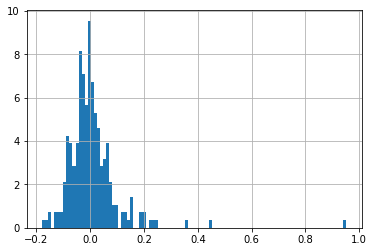

In [14]:
df_merged["return"].hist(bins=100, density=True)

## 4. Descriptive and inferential statistics

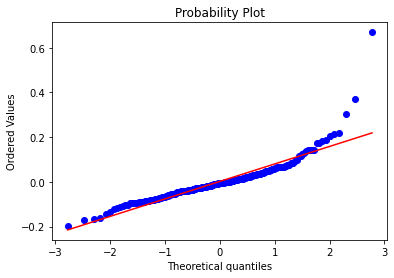

In [15]:
stats.probplot(df_merged["log_return"].dropna(), dist="norm", plot=plt)
plt.show()

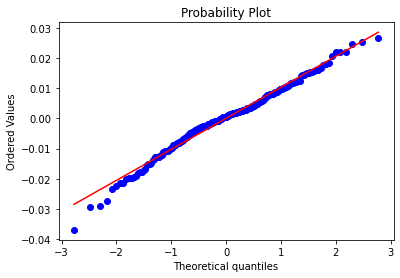

In [68]:
stats.probplot(df_merged["return"].dropna(), dist="norm", plot=plt)
plt.show()

In [60]:
np.e**1.38629

3.999982555558476

<AxesSubplot:>

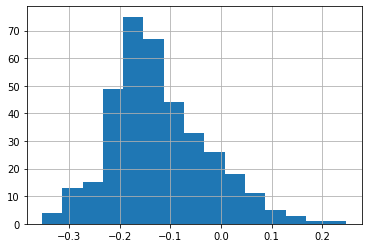

In [12]:
df["pos_minus_neg"].hist(bins=15, )